In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

from matplotlib import font_manager, rc

from google.colab import drive
drive.mount('/content/gdriv')

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 

data_path = "/content/gdriv/My Drive/Colab Notebooks/Data" 

Drive already mounted at /content/gdriv; to attempt to forcibly remount, call drive.mount("/content/gdriv", force_remount=True).
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache dire

In [ ]:
dt1 = pd.read_csv(data_path + '/data01.csv')
dt2 = pd.read_csv(data_path + '/data02.csv')
dt3 = pd.read_csv(data_path + '/data03.csv')
dt1 = dt1.iloc[:,1:]
#print(dt1.head)
#print(dt2.head)
#print(dt3.head)

data = pd.concat([dt1, dt2, dt3], axis = 0)
print(data)

# data.to_csv('gdriv/My Drive/CBALDATA.csv', index=False)

          STD_DD  GU_CD  DONG_CD  MCT_CAT_CD SEX_CD  AGE_CD  USE_CNT  USE_AMT
0       20190201    110      517          10      F      25       11      595
1       20190201    110      517          10      F      50        5      243
2       20190201    110      517          10      F      55        5       27
3       20190201    110      517          10      M      20       11      243
4       20190201    110      517          10      M      25       11      433
...          ...    ...      ...         ...    ...     ...      ...      ...
440598  20200531    350      720          81      M      45       19      127
440599  20200531    350      720          81      M      50       33      211
440600  20200531    350      720          81      M      55        9       61
440601  20200531    350      720          81      M      60       19      194
440602  20200531    350      720          81      M      65        5       29

[2537753 rows x 8 columns]


In [ ]:
code = pd.read_csv(data_path + '/DNG_CODE.csv')
# code.set_index(code['CODE'])
# code['CODE'] = [i for i in code.index]
'''
code2 = code.transpose(copy=True)
code2.columns = code['CODE']
code2 = code2.reset_index(drop=True)
code2 = code2.reset_index(drop=True)
code2 = code2.reset_index(drop=False)
code2
'''
#code['CODE'] = code['CODE'].astype(str)

code['GU_CD'] = code['GU_CD'].astype(str)
code['DONG_CD'] = code['DONG_CD'].astype(str)

code['GUDONG'] = code['GU_CD'] + '-' + code['DONG_CD']
print(code)



   GU_CD DONG_CD  GU_NM DONG_NM   GUDONG
0    140     520  서울 중구     소공동  140-520
1    140     540  서울 중구     회현동  140-540
2    140     550  서울 중구      명동  140-550
3    140     570  서울 중구      필동  140-570
4    140     580  서울 중구     장충동  140-580
..   ...     ...    ...     ...      ...
64   110     650  대구 중구    남산2동  110-650
65   110     660  대구 중구    남산3동  110-660
66   110     670  대구 중구    남산4동  110-670
67   110     680  대구 중구    대봉1동  110-680
68   110     690  대구 중구    대봉2동  110-690

[69 rows x 5 columns]


In [ ]:
##for i in range(len(data)):
##  data[i]
#for i in code['CODE']:
#  rows = (data['DONG_CD'] == i)

#  if rows:
#  data['DNG_NM'] = np.array(code.loc[code['CODE'] == i,'DNG']

data['STD_Y'] = data['STD_DD'].astype(str).str.slice(0, 4)
data['STD_M'] = data['STD_DD'].astype(str).str.slice(4, 6)
data['STD_D'] = data['STD_DD'].astype(str).str.slice(6, 8)

data['STD_YMD'] = pd.to_datetime(data['STD_Y'] + '-' + data['STD_M'] + '-' + data['STD_D'])

data.head()

,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,STD_Y,STD_M,STD_D,STD_YMD
0,20190201,110,517,10,F,25,11,595,2019,02,01,2019-02-01
1,20190201,110,517,10,F,50,5,243,2019,02,01,2019-02-01
2,20190201,110,517,10,F,55,5,27,2019,02,01,2019-02-01
3,20190201,110,517,10,M,20,11,243,2019,02,01,2019-02-01
4,20190201,110,517,10,M,25,11,433,2019,02,01,2019-02-01


In [ ]:
print(data.columns)
print(data.dtypes)
print(data)


Index(['STD_DD', 'GU_CD', 'DONG_CD', 'MCT_CAT_CD', 'SEX_CD', 'AGE_CD',
       'USE_CNT', 'USE_AMT', 'STD_Y', 'STD_M', 'STD_D', 'STD_YMD'],
      dtype='object')
STD_DD                 int64
GU_CD                  int64
DONG_CD                int64
MCT_CAT_CD             int64
SEX_CD                object
AGE_CD                 int64
USE_CNT                int64
USE_AMT                int64
STD_Y                 object
STD_M                 object
STD_D                 object
STD_YMD       datetime64[ns]
dtype: object
          STD_DD  GU_CD  DONG_CD  MCT_CAT_CD  ... STD_Y  STD_M  STD_D    STD_YMD
0       20190201    110      517          10  ...  2019     02     01 2019-02-01
1       20190201    110      517          10  ...  2019     02     01 2019-02-01
2       20190201    110      517          10  ...  2019     02     01 2019-02-01
3       20190201    110      517          10  ...  2019     02     01 2019-02-01
4       20190201    110      517          10  ...  2019     02     01 20

In [ ]:
#col = ['DONG_CD', 'USE_CNT', 'USE_AMT']

data_19 = data.loc[data['STD_Y']=='2019',:]
data_19 = data_19.reset_index(drop=False)
data_19['days'] = 0

for i in range(len(data_19)):
  if data_19['STD_M'][i] == '02':
    data_19['days'][i] = 0
    data_19['days'][i] = data_19['days'][i] + int(data_19['STD_D'][i])
  elif data_19['STD_M'][i] == '03':
    data_19['days'][i] = 28
    data_19['days'][i] = data_19['days'][i] + int(data_19['STD_D'][i])
  elif data_19['STD_M'][i] == '04':
    data_19['days'][i] = 28 + 31
    data_19['days'][i] = data_19['days'][i] + int(data_19['STD_D'][i])
  elif data_19['STD_M'][i] == '05':
    data_19['days'][i] = 28 + 31 + 30
    data_19['days'][i] = data_19['days'][i] + int(data_19['STD_D'][i])

data_19

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/l

,index,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,STD_Y,STD_M,STD_D,STD_YMD,days
0,0,20190201,110,517,10,F,25,11,595,2019,02,01,2019-02-01,1
1,1,20190201,110,517,10,F,50,5,243,2019,02,01,2019-02-01,1
2,2,20190201,110,517,10,F,55,5,27,2019,02,01,2019-02-01,1
3,3,20190201,110,517,10,M,20,11,243,2019,02,01,2019-02-01,1
4,4,20190201,110,517,10,M,25,11,433,2019,02,01,2019-02-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310601,262026,20190531,350,720,81,M,45,9,48,2019,05,31,2019-05-31,120
1310602,262027,20190531,350,720,81,M,50,13,72,2019,05,31,2019-05-31,120
1310603,262028,20190531,350,720,81,M,60,9,99,2019,05,31,2019-05-31,120
1310604,262029,20190531,350,720,81,M,65,9,133,2019,05,31,2019-05-31,120


In [ ]:
data_19['3'] = 3
data_19['7'] = 7
data_19['days'] = data_19['days'] - data_19['3']
data_19 = data_19.loc[data_19['days']>=0,:]
data_19 = data_19.loc[data_19['days']<=111,:]
data_19['WEEK'] = (data_19['days'] / data_19['7']).astype(int) + 1
data_19['DAY'] = data_19['days'] % data_19['7']

In [ ]:
#data_19.reset_index(drop = True)
#data_19.reset_index(drop = False)
#data_19 = data_19.iloc[:, 1:]
#data_19.reset_index(drop = True)
data_19



,index,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,STD_Y,STD_M,STD_D,STD_YMD,days,3,7,WEEK,DAY
22774,22774,20190203,110,517,10,F,20,5,108,2019,02,03,2019-02-03,0,3,7,1,0
22775,22775,20190203,110,517,10,F,50,5,27,2019,02,03,2019-02-03,0,3,7,1,0
22776,22776,20190203,110,517,10,M,20,22,649,2019,02,03,2019-02-03,0,3,7,1,0
22777,22777,20190203,110,517,10,M,25,11,406,2019,02,03,2019-02-03,0,3,7,1,0
22778,22778,20190203,110,517,10,M,45,5,108,2019,02,03,2019-02-03,0,3,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245216,196641,20190525,350,720,81,M,45,22,244,2019,05,25,2019-05-25,111,3,7,16,6
1245217,196642,20190525,350,720,81,M,50,4,11,2019,05,25,2019-05-25,111,3,7,16,6
1245218,196643,20190525,350,720,81,M,55,22,197,2019,05,25,2019-05-25,111,3,7,16,6
1245219,196644,20190525,350,720,81,M,65,9,38,2019,05,25,2019-05-25,111,3,7,16,6


In [ ]:
#data_19.reset_index(drop = True)
#data_19.reset_index(drop = False)

data_19['GU_CD'] = data_19['GU_CD'].astype(str)
data_19['DONG_CD'] = data_19['DONG_CD'].astype(str)

data_19['GUDONG'] = data_19['GU_CD'] + '-' + data_19['DONG_CD']

data_19.head()

,index,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,STD_Y,STD_M,STD_D,STD_YMD,days,3,7,WEEK,DAY,GUDONG
22774,22774,20190203,110,517,10,F,20,5,108,2019,02,03,2019-02-03,0,3,7,1,0,110-517
22775,22775,20190203,110,517,10,F,50,5,27,2019,02,03,2019-02-03,0,3,7,1,0,110-517
22776,22776,20190203,110,517,10,M,20,22,649,2019,02,03,2019-02-03,0,3,7,1,0,110-517
22777,22777,20190203,110,517,10,M,25,11,406,2019,02,03,2019-02-03,0,3,7,1,0,110-517
22778,22778,20190203,110,517,10,M,45,5,108,2019,02,03,2019-02-03,0,3,7,1,0,110-517


In [ ]:
week_01 = data_19.loc[data_19['WEEK'] == 1, :]
week_02 = data_19.loc[data_19['WEEK'] == 2, :]
week_03 = data_19.loc[data_19['WEEK'] == 3, :]
week_04 = data_19.loc[data_19['WEEK'] == 4, :]
week_05 = data_19.loc[data_19['WEEK'] == 5, :]
week_06 = data_19.loc[data_19['WEEK'] == 6, :]
week_07 = data_19.loc[data_19['WEEK'] == 7, :]
week_08 = data_19.loc[data_19['WEEK'] == 8, :]
week_09 = data_19.loc[data_19['WEEK'] == 9, :]
week_10 = data_19.loc[data_19['WEEK'] == 10, :]
week_11 = data_19.loc[data_19['WEEK'] == 11, :]
week_12 = data_19.loc[data_19['WEEK'] == 12, :]
week_13 = data_19.loc[data_19['WEEK'] == 13, :]
week_14 = data_19.loc[data_19['WEEK'] == 14, :]
week_15 = data_19.loc[data_19['WEEK'] == 15, :]
week_16 = data_19.loc[data_19['WEEK'] == 16, :]

period_01 = pd.concat([week_01, week_02, week_03, week_04], axis = 0)
period_02 = pd.concat([week_05, week_06, week_07, week_08], axis = 0)
period_03 = pd.concat([week_09, week_10, week_11, week_12], axis = 0)
period_04 = pd.concat([week_13, week_14, week_15, week_16], axis = 0)

period_01.head()

,index,STD_DD,GU_CD,DONG_CD,MCT_CAT_CD,SEX_CD,AGE_CD,USE_CNT,USE_AMT,STD_Y,STD_M,STD_D,STD_YMD,days,3,7,WEEK,DAY,GUDONG
22774,22774,20190203,110,517,10,F,20,5,108,2019,02,03,2019-02-03,0,3,7,1,0,110-517
22775,22775,20190203,110,517,10,F,50,5,27,2019,02,03,2019-02-03,0,3,7,1,0,110-517
22776,22776,20190203,110,517,10,M,20,22,649,2019,02,03,2019-02-03,0,3,7,1,0,110-517
22777,22777,20190203,110,517,10,M,25,11,406,2019,02,03,2019-02-03,0,3,7,1,0,110-517
22778,22778,20190203,110,517,10,M,45,5,108,2019,02,03,2019-02-03,0,3,7,1,0,110-517


In [ ]:
cols = ['GUDONG', 'USE_CNT', 'USE_AMT', 'STD_YMD']

weeksum_01 = period_01.loc[:,cols].groupby(['STD_YMD', 'GUDONG']).sum()
weeksum_02 = period_02.loc[:,cols].groupby(['STD_YMD', 'GUDONG']).sum()
weeksum_03 = period_03.loc[:,cols].groupby(['STD_YMD', 'GUDONG']).sum()
weeksum_04 = period_04.loc[:,cols].groupby(['STD_YMD', 'GUDONG']).sum()

weeksum_01['STD_YMD'] = [i[0] for i in weeksum_01.index]
weeksum_01['GUDONG'] = [i[1] for i in weeksum_01.index]
weeksum_02['STD_YMD'] = [i[0] for i in weeksum_02.index]
weeksum_02['GUDONG'] = [i[1] for i in weeksum_02.index]
weeksum_03['STD_YMD'] = [i[0] for i in weeksum_03.index]
weeksum_03['GUDONG'] = [i[1] for i in weeksum_03.index]
weeksum_04['STD_YMD'] = [i[0] for i in weeksum_04.index]
weeksum_04['GUDONG'] = [i[1] for i in weeksum_04.index]

weeksum_01 = weeksum_01.reset_index(drop=True)
weeksum_02 = weeksum_02.reset_index(drop=True)
weeksum_03 = weeksum_03.reset_index(drop=True)
weeksum_04 = weeksum_04.reset_index(drop=True)
'''
weeksum_01 = weeksum_01.reset_index(drop=False)
weeksum_02 = weeksum_02.reset_index(drop=False)
weeksum_03 = weeksum_03.reset_index(drop=False)
weeksum_04 = weeksum_04.reset_index(drop=False)
'''
'''
for i in code['CODE']:
  weeksum_01.loc[weeksum_01['DONG_CD'] == i, 'DONG_NM'] = code.loc[code['CODE'] == i, :].iloc[:,2]
'''
weeksum_01


,USE_CNT,USE_AMT,STD_YMD,GUDONG
0,4087,105484,2019-02-03,110-517
1,28576,827882,2019-02-03,110-545
2,49603,1328257,2019-02-03,110-565
3,31753,1512358,2019-02-03,110-575
4,1241,33512,2019-02-03,110-585
...,...,...,...,...
1927,8383,133405,2019-03-02,350-670
1928,30683,795339,2019-03-02,350-695
1929,7784,119689,2019-03-02,350-700
1930,8341,135854,2019-03-02,350-710


In [ ]:
weeksum_01['DONGNM'] = weeksum_01['GUDONG'].map(lambda x: np.array(code.loc[code['GUDONG']==x,:].iloc[:,3])[0])
weeksum_02['DONGNM'] = weeksum_02['GUDONG'].map(lambda x: np.array(code.loc[code['GUDONG']==x,:].iloc[:,3])[0])
weeksum_03['DONGNM'] = weeksum_03['GUDONG'].map(lambda x: np.array(code.loc[code['GUDONG']==x,:].iloc[:,3])[0])
weeksum_04['DONGNM'] = weeksum_04['GUDONG'].map(lambda x: np.array(code.loc[code['GUDONG']==x,:].iloc[:,3])[0])


cols = ['DONGNM', 'USE_CNT', 'USE_AMT', 'STD_YMD']


weeksum_01 = weeksum_01.loc[:,cols].groupby(['STD_YMD', 'DONGNM']).sum()
weeksum_02 = weeksum_02.loc[:,cols].groupby(['STD_YMD', 'DONGNM']).sum()
weeksum_03 = weeksum_03.loc[:,cols].groupby(['STD_YMD', 'DONGNM']).sum()
weeksum_04 = weeksum_04.loc[:,cols].groupby(['STD_YMD', 'DONGNM']).sum()

weeksum_01['STD_YMD'] = [i[0] for i in weeksum_01.index]
weeksum_01['DONGNM'] = [i[1] for i in weeksum_01.index]
weeksum_02['STD_YMD'] = [i[0] for i in weeksum_02.index]
weeksum_02['DONGNM'] = [i[1] for i in weeksum_02.index]
weeksum_03['STD_YMD'] = [i[0] for i in weeksum_03.index]
weeksum_03['DONGNM'] = [i[1] for i in weeksum_03.index]
weeksum_04['STD_YMD'] = [i[0] for i in weeksum_04.index]
weeksum_04['DONGNM'] = [i[1] for i in weeksum_04.index]
weeksum_01

USE_CNT  USE_AMT    STD_YMD DONGNM
STD_YMD    DONGNM                                    
2019-02-03 고산1동      16580   391901 2019-02-03   고산1동
           고산2동      13571   436380 2019-02-03   고산2동
           고산3동      13171   339288 2019-02-03   고산3동
           공릉1동      21407   493344 2019-02-03   공릉1동
           공릉2동      17417   347320 2019-02-03   공릉2동
...                    ...      ...        ...    ...
2019-03-02 하계2동       5044    65019 2019-03-02   하계2동
           황금1동       3184    59470 2019-03-02   황금1동
           황금2동       6770   268188 2019-03-02   황금2동
           황학동       14304   458217 2019-03-02    황학동
           회현동       50085  2660481 2019-03-02    회현동

[1932 rows x 4 columns]

In [ ]:
p1 = []
for i in weeksum_01['DONGNM'].unique():
  rows = (weeksum_01['DONGNM']==i)
  p1.append(np.array(weeksum_01.loc[rows, 'USE_AMT'].transpose().tolist()))

p2 = []
for i in weeksum_02['DONGNM'].unique():
  rows = (weeksum_02['DONGNM']==i)
  p2.append(np.array(weeksum_02.loc[rows, 'USE_AMT'].transpose().tolist()))

p3 = []
for i in weeksum_03['DONGNM'].unique():
  rows = (weeksum_03['DONGNM']==i)
  p3.append(np.array(weeksum_03.loc[rows, 'USE_AMT'].transpose().tolist()))

p4 = []
for i in weeksum_04['DONGNM'].unique():
  rows = (weeksum_04['DONGNM']==i)
  p4.append(np.array(weeksum_04.loc[rows, 'USE_AMT'].transpose().tolist()))
#  p1 = p1.append(weeksum_01.loc[rows, 'INVC_CONT'].tolist())
#  P1 = P1.append(weeksum_01.loc[rows, 'INVC_CONT'], ignore_index = True)
#P1.values
p1 = np.array(p1)
p2 = np.array(p2)
p3 = np.array(p3)
p4 = np.array(p4)
p0 = p1 + p2 + p3 + p4

In [ ]:
p1 = pd.DataFrame(p1)
p2 = pd.DataFrame(p2)
p3 = pd.DataFrame(p3)
p4 = pd.DataFrame(p4)
DONGDONG = pd.DataFrame(weeksum_01['DONGNM'].unique())
PERIOD = pd.concat([DONGDONG,p1,p2,p3,p4], axis = 1)
PERIOD.to_csv('gdriv/My Drive/SH_PERIOD.csv', index=False, encoding = 'euc-kr')

In [ ]:
P0 = pd.DataFrame(p0)
#P1 = pd.DataFrame(p1)
#P2 = pd.DataFrame(p2)
#P3 = pd.DataFrame(p3)
#P4 = pd.DataFrame(p4)
P0
#P1.values
#P2.values
#P3.values
#P4.values

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,1236038,1322493,1017145,1140452,1259075,1307432,1608796,1011662,1312193,1152598,1291043,1188102,1298423,1556272,1038868,1269283,1309979,1269056,1271696,1369633,1611176,1107430,1298699,1238822,1303963,1257447,1317183,1559480
1,1685217,1196659,1187205,1230089,1248249,1303878,1859766,1371746,1381622,1129767,1316035,1225298,1342942,2107118,1473847,1225012,1230750,1173339,1115150,1350982,1661514,1192338,1179353,1141574,1331486,1239357,1540207,2294215
2,942103,1001252,809715,854943,868644,1008775,1089325,832584,953906,891769,975504,908457,978926,1167767,831803,901579,897045,955189,852546,902833,1153887,827196,872137,900849,953063,960364,968719,1093970
3,2000637,2199099,2001518,2066361,2302136,2437148,2857338,1988425,2242206,2331798,2259668,2211263,2436651,2893452,1991008,2285024,2213411,2332888,2195868,2553518,2702643,1889692,2367819,2325179,2343427,2332110,2579747,2812853
4,1437125,1829416,1665833,1742315,1942891,1912301,1771094,1457907,1800056,1872044,1856473,1923236,1863574,1887163,1540898,1849093,1858439,1875573,1817003,2004032,1878495,1414032,1878536,1980484,1826399,1923431,1869631,1975581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,195088,263765,187221,221776,225158,234487,245868,155370,222505,229512,240630,214960,223361,261480,143828,228279,197080,212256,206536,236055,273554,151601,218487,217373,216340,233518,229059,263007
65,179634,207367,174746,198882,229720,215585,227031,138801,259017,193978,206550,210917,239779,261735,146850,224772,190882,193289,184409,219748,263465,143919,233603,201028,233934,209939,220936,249366
66,824665,903969,964953,834933,983431,1042421,1116988,730261,1004672,920647,902176,1212358,2296835,1506758,782851,1253095,1941845,2060920,1106219,1106013,1501758,802952,1632744,1413055,1469492,1321222,2173198,1218116
67,1473143,1437499,1142490,1194653,1162036,1342814,1845589,1038333,1372970,1167931,1261393,1242591,1419113,1890867,1009509,1264886,1252637,1270633,1255865,1411089,1908550,1045844,1412944,1365985,1291571,1224492,1477724,1958904


In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_train = minmax_scale(P0, axis=1, copy=True)
scaled_train

array([[0.37426315, 0.51847163, 0.00914574, ..., 0.40997375, 0.50961445,
        0.91377015],
       [0.48349073, 0.0691302 , 0.06111198, ..., 0.10534364, 0.36050345,
        1.        ],
       [0.36974518, 0.53494185, 0.        , ..., 0.42074615, 0.44408075,
        0.79389307],
       ...,
       [0.06026144, 0.11088401, 0.14981227, ..., 0.37723146, 0.9210781 ,
        0.31141523],
       [0.48834679, 0.45080288, 0.1400692 , ..., 0.2264421 , 0.49317197,
        1.        ],
       [0.37788894, 0.17118449, 0.07810964, ..., 0.33545803, 0.59459033,
        0.8153709 ]])

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
res = model.fit(scaled_train)
'''
res.score(scaled_train)
score = []
for i in range(2,30):
  model = KMeans(n_clusters=i)
  res = model.fit(scaled_train)
  score.append(res.score(scaled_train))
print(score)
'''

'\nres.score(scaled_train)\nscore = []\nfor i in range(2,30):\n  model = KMeans(n_clusters=i)\n  res = model.fit(scaled_train)\n  score.append(res.score(scaled_train))\nprint(score)\n'

In [ ]:
res.score(scaled_train)

-43.32933885050723

In [ ]:
score = []
for i in range(2,30):
  model = KMeans(n_clusters=i)
  res = model.fit(scaled_train)
  score.append(res.score(scaled_train))
print(score)

[-61.0266444778307, -51.57738585958153, -43.18826440275214, -39.71882938359803, -36.89440948206056, -34.70195171914908, -32.459005214664145, -30.949887450019126, -29.113107878478136, -28.302065830096748, -26.733035406254174, -25.60600389592905, -24.03294062815266, -23.17463408552045, -21.57063433785148, -20.647775607754202, -20.17852226124766, -19.621021120881604, -17.808121074782008, -17.169535072173005, -16.46589115093805, -15.767344124205207, -14.625261668617881, -14.187357876279822, -13.769673998063475, -13.063144760407827, -12.74738529475105, -11.90483421090229]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


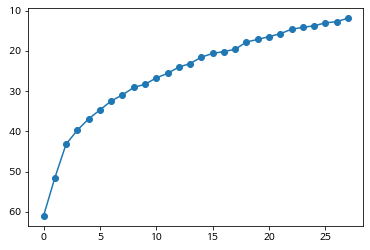

In [ ]:
plt.plot(score, marker = 'o')

In [ ]:
model = KMeans(n_clusters=4)
'''
res = model.fit(scaled_train)
res.labels_
name = pd.DataFrame(weeksum_01['DONGNM'].unique()).reset_index(drop=True)
cluster_res = pd.concat([name,pd.DataFrame(res.labels_)],axis=1)
cluster_res.columns = ['name','cluster']
cluster_res
'''

"\nres = model.fit(scaled_train)\nres.labels_\nname = pd.DataFrame(weeksum_01['DONGNM'].unique()).reset_index(drop=True)\ncluster_res = pd.concat([name,pd.DataFrame(res.labels_)],axis=1)\ncluster_res.columns = ['name','cluster']\ncluster_res\n"

In [ ]:
res = model.fit(scaled_train)

In [ ]:
res.labels_

In [ ]:
name = pd.DataFrame(weeksum_01['DONGNM'].unique()).reset_index(drop=True)
cluster_res = pd.concat([name,pd.DataFrame(res.labels_)],axis=1)
cluster_res.columns = ['name','cluster']
cluster_res

In [ ]:
cluster_dt = pd.concat([cluster_res,pd.DataFrame(scaled_train)],axis=1)
print(cluster_dt)

In [ ]:
for k in range(4): # k는 군집수
  cluster0 = cluster_dt.loc[cluster_dt['cluster']==k,:]
  idx = cluster0['name']
  cluster = cluster0.iloc[:,2:].reset_index(drop=True)
  plt.rcParams['figure.figsize'] = (20, 10)
  for i in range(len(cluster)):
    plt.plot(cluster.iloc[i,:])
    
  plt.title('동별 소비금액 추이 Cluster' + str(k))
  plt.legend(idx)
  plt.show()

In [ ]:
p1 = []
for i in weeksum_01['DONGNM'].unique():
  rows = (weeksum_01['DONGNM']==i)
  p1.append(np.array(weeksum_01.loc[rows, 'USE_CNT'].transpose().tolist()))

p2 = []
for i in weeksum_02['DONGNM'].unique():
  rows = (weeksum_02['DONGNM']==i)
  p2.append(np.array(weeksum_02.loc[rows, 'USE_CNT'].transpose().tolist()))

p3 = []
for i in weeksum_03['DONGNM'].unique():
  rows = (weeksum_03['DONGNM']==i)
  p3.append(np.array(weeksum_03.loc[rows, 'USE_CNT'].transpose().tolist()))

p4 = []
for i in weeksum_04['DONGNM'].unique():
  rows = (weeksum_04['DONGNM']==i)
  p4.append(np.array(weeksum_04.loc[rows, 'USE_CNT'].transpose().tolist()))
#  p1 = p1.append(weeksum_01.loc[rows, 'INVC_CONT'].tolist())
#  P1 = P1.append(weeksum_01.loc[rows, 'INVC_CONT'], ignore_index = True)
#P1.values
p1 = np.array(p1)
p2 = np.array(p2)
p3 = np.array(p3)
p4 = np.array(p4)
p0 = p1 + p2 + p3 + p4

P0 = pd.DataFrame(p0)
#P1 = pd.DataFrame(p1)
#P2 = pd.DataFrame(p2)
#P3 = pd.DataFrame(p3)
#P4 = pd.DataFrame(p4)
P0
#P1.values
#P2.values
#P3.values
#P4.values

In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_train = minmax_scale(P0, axis=1, copy=True)
scaled_train

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
res = model.fit(scaled_train)

res.score(scaled_train)
score = []
for i in range(2,30):
  model = KMeans(n_clusters=i)
  res = model.fit(scaled_train)
  score.append(res.score(scaled_train))
print(score)

In [ ]:
plt.plot(score, marker = 'o')

In [ ]:
model = KMeans(n_clusters=5)

res = model.fit(scaled_train)
res.labels_
name = pd.DataFrame(weeksum_01['DONGNM'].unique()).reset_index(drop=True)
cluster_res = pd.concat([name,pd.DataFrame(res.labels_)],axis=1)
cluster_res.columns = ['name','cluster']
cluster_res

In [ ]:
cluster_dt = pd.concat([cluster_res,pd.DataFrame(scaled_train)],axis=1)
print(cluster_dt)

In [ ]:
for k in range(5): # k는 군집수
  cluster0 = cluster_dt.loc[cluster_dt['cluster']==k,:]
  idx = cluster0['name']
  cluster = cluster0.iloc[:,2:].reset_index(drop=True)
  plt.rcParams['figure.figsize'] = (20, 10)
  for i in range(len(cluster)):
    plt.plot(cluster.iloc[i,:])
    
  plt.title('동별 소비횟수 추이 Cluster' + str(k))
  plt.legend(idx)
  plt.show()